In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [3]:
!pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
file_path = '../data/pain_levels.xlsx'
excel_data = pd.ExcelFile(file_path)
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in excel_data.sheet_names}
sheets_dict

{'Munka1':    Participant      Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
 0        Dávid         Session         1.0         2.0         3.0   
 1          NaN   Roland-Morris         4.0         5.0         5.0   
 2          NaN  Oswestry Index         3.0         3.0         2.0   
 3          NaN             NaN         NaN         NaN         NaN   
 4       István         Session         1.0         2.0         3.0   
 5          NaN   Roland-Morris         5.0         6.0         3.0   
 6          NaN  Oswestry Index        13.0         4.0         6.0   
 7          NaN             NaN         NaN         NaN         NaN   
 8       Patrik         Session         1.0         2.0         3.0   
 9          NaN   Roland-Morris         3.0         1.0         1.0   
 10         NaN  Oswestry Index         8.0         6.0         5.0   
 11         NaN             NaN         NaN         NaN         NaN   
 12      Zoltán         Session         1.0         2.0         3.0

Clean and format the data for easy access by name and session. 

A dictionary is built where each participant's data is organized by session,
and for each session, we can access both RM (Roland-Morris) and OI (Oswestry Index) values.

In [3]:
cleaned_data = {}

for idx in range(0, len(sheets_dict['Munka1']), 4):
    participant_name = sheets_dict['Munka1'].iloc[idx, 0]
    
    if pd.isna(participant_name):
        continue
    
    cleaned_data[participant_name] = {}
    
    # Extract session, RM, and OI data
    sessions = sheets_dict['Munka1'].iloc[idx, 2:7].values
    rm_scores = sheets_dict['Munka1'].iloc[idx + 1, 2:7].values
    oi_scores = sheets_dict['Munka1'].iloc[idx + 2, 2:7].values
    
    for i, session in enumerate(sessions):
        if not pd.isna(session):
            cleaned_data[participant_name][f'Session_{int(session)}'] = {
                'RM': rm_scores[i],
                'OI': oi_scores[i]
            }
cleaned_data

{'Dávid': {'Session_1': {'RM': np.float64(4.0), 'OI': np.float64(3.0)},
  'Session_2': {'RM': np.float64(5.0), 'OI': np.float64(3.0)},
  'Session_3': {'RM': np.float64(5.0), 'OI': np.float64(2.0)},
  'Session_4': {'RM': np.float64(5.0), 'OI': np.float64(1.0)}},
 'István': {'Session_1': {'RM': np.float64(5.0), 'OI': np.float64(13.0)},
  'Session_2': {'RM': np.float64(6.0), 'OI': np.float64(4.0)},
  'Session_3': {'RM': np.float64(3.0), 'OI': np.float64(6.0)},
  'Session_4': {'RM': np.float64(3.0), 'OI': np.float64(5.0)},
  'Session_5': {'RM': np.float64(2.0), 'OI': np.float64(5.0)}},
 'Patrik': {'Session_1': {'RM': np.float64(3.0), 'OI': np.float64(8.0)},
  'Session_2': {'RM': np.float64(1.0), 'OI': np.float64(6.0)},
  'Session_3': {'RM': np.float64(1.0), 'OI': np.float64(5.0)},
  'Session_4': {'RM': np.float64(1.0), 'OI': np.float64(4.0)}},
 'Zoltán': {'Session_1': {'RM': np.float64(8.0), 'OI': np.float64(10.0)},
  'Session_2': {'RM': np.float64(4.0), 'OI': np.float64(7.0)},
  'Session_

In [4]:
rm_oi_mapping = {}

for participant, sessions in cleaned_data.items():
    for session, values in sessions.items():
        session_num = int(session.split('_')[1])
        rm_oi_mapping[(participant, session_num)] = {
            'RM': values['RM'],
            'OI': values['OI']
        }

In [5]:
rm_oi_df = pd.DataFrame.from_dict(rm_oi_mapping, orient='index')
rm_oi_df['Participant'] = rm_oi_df.index.map(lambda x: x[0])
rm_oi_df['session_id'] = rm_oi_df.index.map(lambda x: x[1])

rm_oi_df.reset_index(drop=True, inplace=True)

In [6]:
rm_oi_df.to_pickle("rm_oi_df.pkl")

# Plots

In [7]:
df = pd.read_pickle("rm_oi_df.pkl")

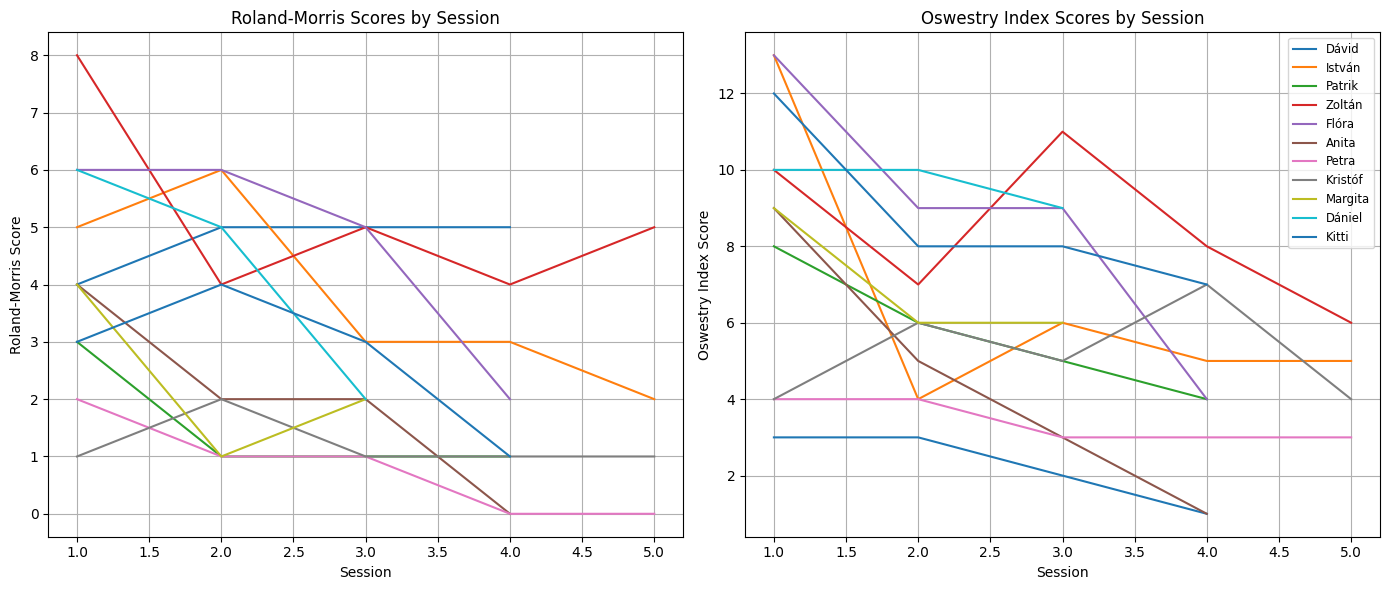

In [8]:
participants = df['Participant'].unique()
plt.figure(figsize=(14, 6))

# Plot 1: Roland-Morris Scores
plt.subplot(1, 2, 1)
for participant in participants:
    participant_data = df[df['Participant'] == participant]
    plt.plot(participant_data['session_id'], participant_data['RM'], label=participant)
plt.title('Roland-Morris Scores by Session')
plt.xlabel('Session')
plt.ylabel('Roland-Morris Score')
plt.grid(True)

# Plot 2: Oswestry Index Scores
plt.subplot(1, 2, 2)
for participant in participants:
    participant_data = df[df['Participant'] == participant]
    plt.plot(participant_data['session_id'], participant_data['OI'], label=participant)
plt.title('Oswestry Index Scores by Session')
plt.xlabel('Session')
plt.ylabel('Oswestry Index Score')
plt.grid(True)

plt.tight_layout()
plt.legend(loc='upper right', fontsize='small')
plt.show()